# https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data, all temperatures are in celcius.  As the global temperatures rise, there will be unpredictable changes in the weather patterns.  Oceans will get warmer raising the evaporation rate which will produce more clouds and precipitation leading to more severe storms, flooding, extreme wind, causing soil erosion and pollution.  Making livelihoods like farming unsustainable.

In [1]:
import pandas as pd
import numpy as np
np.random.seed(7)
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
%matplotlib inline
df = pd.read_csv('GlobalTemperatures.csv')
pd.set_option('display.max_columns', None)
df.head()

C:\Users\willi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


# EDA 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [3]:
df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [4]:
#Parse the timestamp to datetime row index of the DataFrame
datetime_rowid = df['dt'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d %H:%M:%S'))
df.index = datetime_rowid

# Dropping all nulls from 1750 to about 1860, I think we'll still be able to see the trend of MaxLandTempatures.

In [5]:
df.dropna( inplace=True)

<AxesSubplot:xlabel='dt'>

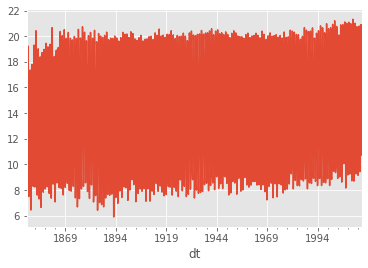

In [6]:
df['LandMaxTemperature'].plot()

<AxesSubplot:xlabel='dt'>

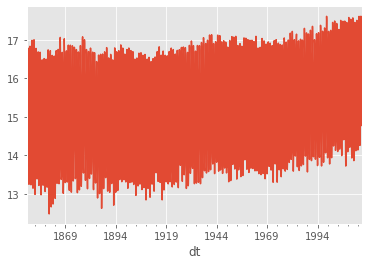

In [7]:
df['LandAndOceanAverageTemperature'].plot()

# Resampling by monthly average

In [8]:
df['land_ocean_monthly_average'] = df['LandAndOceanAverageTemperature'].rolling(30).mean()

<AxesSubplot:xlabel='dt'>

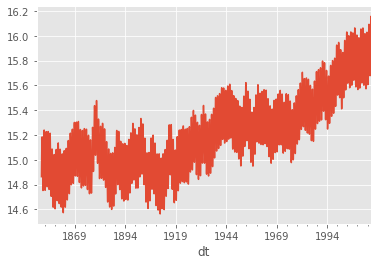

In [9]:
df['land_ocean_monthly_average'].plot()

In [10]:
df['land_monthly_average'] = df['LandMaxTemperature'].rolling(30).mean()

<AxesSubplot:xlabel='dt'>

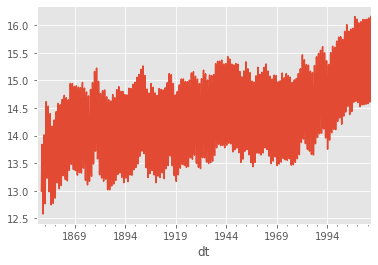

In [11]:
df['land_monthly_average'].plot()

<AxesSubplot:xlabel='LandMaxTemperature'>

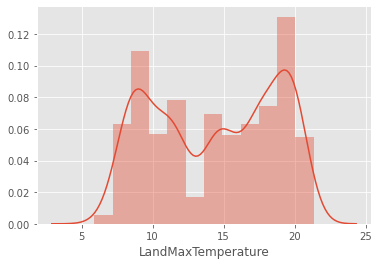

In [12]:
sns.distplot(df['LandMaxTemperature'])

<AxesSubplot:xlabel='LandAndOceanAverageTemperature'>

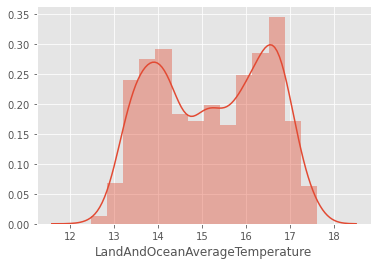

In [13]:
sns.distplot(df['LandAndOceanAverageTemperature'])

# Temperature and weather patterns have a dramatic affect on crops.  One thing that regulates the earths temperature are clouds.  Clouds also determine when it rains, which provides water not only for crops but for all life and the amount of mostuire in clouds and clouds themselves dissapate as the temperature rises. But as the climate changes, the affect it will have on cloud formations and the earth is still unknown. https://www.weather.gov/source/zhu/ZHU_Training_Page/clouds/clouds_dissipation/cloud_dissipation.htm

# https://isccp.giss.nasa.gov/role.html

In [14]:
df.corr()['LandAverageTemperature']

LandAverageTemperature                       1.000000
LandAverageTemperatureUncertainty           -0.143129
LandMaxTemperature                           0.995807
LandMaxTemperatureUncertainty               -0.108462
LandMinTemperature                           0.995611
LandMinTemperatureUncertainty               -0.167451
LandAndOceanAverageTemperature               0.988066
LandAndOceanAverageTemperatureUncertainty   -0.131412
land_ocean_monthly_average                   0.236081
land_monthly_average                         0.280127
Name: LandAverageTemperature, dtype: float64

# Visualizing the relationship between the average ocean temperature and the maximum land temperature.

In [15]:
X = df['LandAndOceanAverageTemperature'].values.reshape(-1,1)
y = df['LandMaxTemperature']

In [16]:
print(X.shape)
print(y.shape)

(1992, 1)
(1992,)


In [17]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred =lr.predict(X_test)

# The red line is not as important to answer this question, we are not trying to make predictions, only check the relationship. Below it says there is a 98% correlation but that is not ocean temperature alone, it is land and ocean temperature.

No handles with labels found to put in legend.


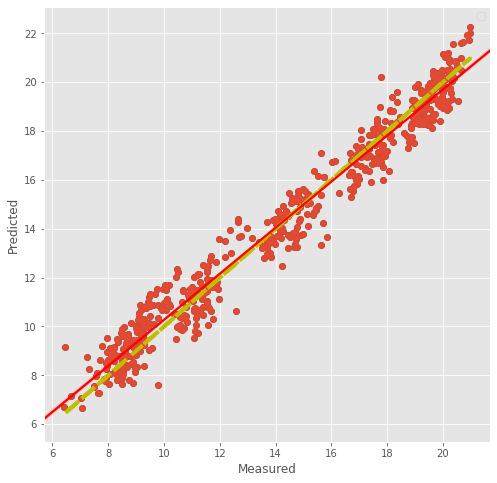

In [19]:
#Visualizing the accuracy of the model compared to the real data, the red line is the predicted and the yellow is the actual
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_test, pred, edgecolors=(0, 0, 0))
ax.plot(y_test, y_test, 'k--', lw=4, color='y')
sns.regplot(x=y_test, y=pred, ax=ax, line_kws={"color": "red"})
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

ax.legend()

# Feature engineering


In [20]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,land_ocean_monthly_average,land_monthly_average
dt,,,,,,,,,,,
1850-01-01,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,NaN,NaN
1850-02-01,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,NaN,NaN
1850-03-01,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,NaN,NaN
1850-04-01,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,NaN,NaN
1850-05-01,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,NaN,NaN


# As the difference between these two measurements gets less and less, there will be negative impacts on our health and the environment.

# https://climate.nasa.gov/news/2865/a-degree-of-concern-why-global-temperatures-matter/


# https://granitegeek.concordmonitor.com/2020/08/13/higher-high-temps-are-bad-less-low-low-temps-might-be-worse/

In [21]:
df['differenced_temp'] = df['LandMaxTemperature'] - df['LandMinTemperature']

<AxesSubplot:xlabel='dt'>

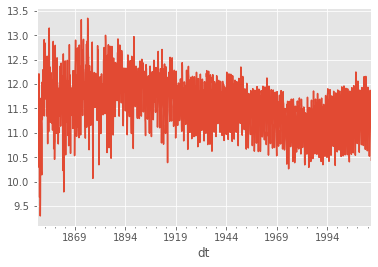

In [22]:
df['differenced_temp'].plot()

In [23]:
df['differenced_temp_monthly_average'] = df['differenced_temp'].rolling(30).mean()

<AxesSubplot:xlabel='dt'>

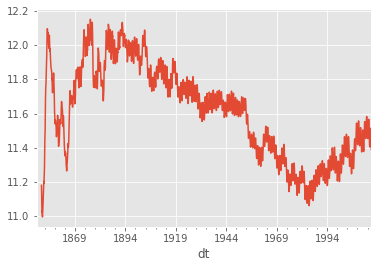

In [24]:
df['differenced_temp_monthly_average'].plot()

In [25]:
#Checking all the new columns I have created, land_ocean_monthly_average, land_monthly_average, differenced_temp
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,land_ocean_monthly_average,land_monthly_average,differenced_temp,differenced_temp_monthly_average
dt,,,,,,,,,,,,,
1850-01-01,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,NaN,NaN,11.448,NaN
1850-02-01,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,NaN,NaN,12.261,NaN
1850-03-01,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,NaN,NaN,12.252,NaN
1850-04-01,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,NaN,NaN,11.916,NaN
1850-05-01,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,NaN,NaN,11.844,NaN


In [26]:
df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,land_ocean_monthly_average,land_monthly_average,differenced_temp,differenced_temp_monthly_average
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1963.000000,1963.000000,1992.000000,1963.000000
mean,8.571583,0.276663,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532,15.209399,14.349878,11.607006,11.610312
std,4.263193,0.224030,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587,0.325077,0.687526,0.509819,0.272725
min,0.404000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000,14.562800,12.579900,9.296000,10.994533
25%,4.430000,0.099750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000,14.976283,13.786867,11.300750,11.376167
50%,8.850500,0.230000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000,15.175133,14.369867,11.644000,11.641667
75%,12.858500,0.347250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000,15.422567,14.850733,11.934250,11.824600
max,15.482000,1.492000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000,16.156967,16.162900,13.346000,12.152333


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1992 entries, 1850-01-01 to 2015-12-01
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         1992 non-null   object 
 1   LandAverageTemperature                     1992 non-null   float64
 2   LandAverageTemperatureUncertainty          1992 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
 9   land_ocean_monthly_average                 1963 non-null   float64
 10  land_m

In [28]:
averages = df[['dt', 'land_ocean_monthly_average', 'land_monthly_average', 'differenced_temp_monthly_average']]

In [29]:
#It looks like all the null values are early on so I don't think dropping them will affect the trend
averages.isnull()

,dt,land_ocean_monthly_average,land_monthly_average,differenced_temp_monthly_average
dt,,,,
1850-01-01,False,True,True,True
1850-02-01,False,True,True,True
1850-03-01,False,True,True,True
1850-04-01,False,True,True,True
1850-05-01,False,True,True,True
...,...,...,...,...
2015-08-01,False,False,False,False
2015-09-01,False,False,False,False
2015-10-01,False,False,False,False


In [30]:
averages.dropna(inplace=True)

<AxesSubplot:xlabel='dt'>

<Figure size 792x648 with 0 Axes>

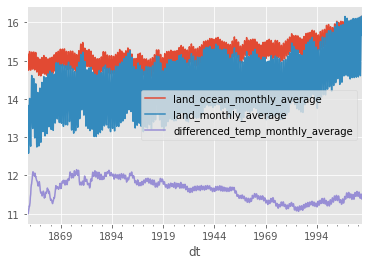

In [31]:
plt.figure(figsize=(11,9))
averages.plot()

No handles with labels found to put in legend.


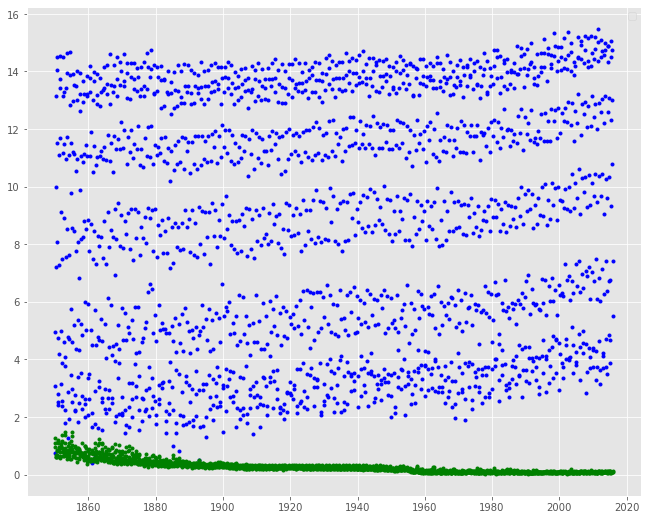

In [32]:
plt.figure(figsize=(11,9))
plt.plot(df['LandAverageTemperature'], '.b',color='b')
plt.plot(df['LandAverageTemperatureUncertainty'], '.b',color='g')
plt.legend()

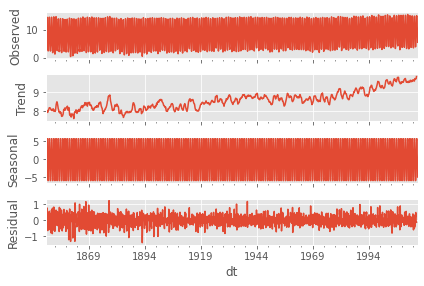

In [33]:
import statsmodels.api as sm
# decompose dataset
res = sm.tsa.seasonal_decompose(df['LandAverageTemperature'], model="additive")
resplot = res.plot()


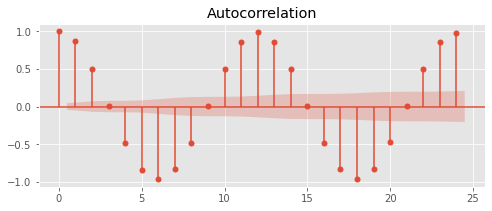

In [34]:
#Each time lag is highly correlated with the previous time lag
#Indirect correlation - each lag is influenced by the previous
#Weather patterns usually follow the four seasons: summer, winter,spring fall
#https://study.com/academy/lesson/weather-patterns-lesson-for-kids.html#:~:text=A%20weather%20pattern%20occurs%20when,wet%20and%20rainy%2C%20or%20cold.
#https://www.noaa.gov/education/resource-collections/weather-atmosphere/weather-systems-patterns
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(df['LandAverageTemperature'],ax=ax, lags=24);

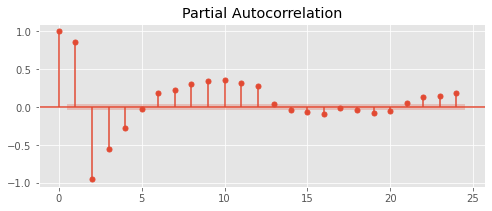

In [35]:
#Shows direct correlation - shows the relationship between each lag and the first
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(8,3))
plot_pacf(df['LandAverageTemperature'],ax=ax, lags=24);

# Triple Exponential Smoothing
# Alpha - controls the amount of influence past values have on current values - larger values mean that more recent values have more influence, smaller values mean more historic values are considered

# Beta - controls the influence of change in trend


# Gamma - controls the influence of the seasonal component


# https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/

In [36]:
# Capture seasonality component
def initialize_T(x, seasonLength):
    total=0.0
    for i in range(seasonLength):
        total+=float(x[i+seasonLength]-x[i])/seasonLength
    return total

In [37]:
initialize_T(df['LandAverageTemperature'], 12)

0.27791666666666626

In [38]:
# Initialize seasonal trend
def initialize_seasonalilty(x, seasonLength):
    seasons={}
    seasonsMean=[]
    num_season=int(len(x)/seasonLength)
    # Compute season average
    for i in range(num_season):
        seasonsMean.append(sum(x[seasonLength*i:seasonLength*i+seasonLength])/float(seasonLength))
    
    # compute season intial values
    for i in range(seasonLength):
        tot=0.0
        for j in range(num_season):
            tot+=x[seasonLength*j+i]-seasonsMean[j]
        seasons[i]=tot/num_season
    return seasons
            
initialize_seasonalilty(df['LandAverageTemperature'], 12) 

{0: -6.023631024096386,
 1: -5.495082831325301,
 2: -3.420064759036145,
 3: -0.24742620481927743,
 4: 2.669790662650601,
 5: 4.841393072289154,
 6: 5.798489457831327,
 7: 5.265555722891565,
 8: 3.4255737951807226,
 9: 0.7626340361445783,
 10: -2.5797093373493976,
 11: -4.997522590361448}

In [39]:
# Triple Exponential Smoothing Forecast
def triple_exp_smoothing(x, seasonLength, alpha, beta, gamma, h):
    yhat=[]
    S = initialize_seasonalilty(x, seasonLength)
    for i in range(len(x)+h):
        if i == 0:
            F = x[0]
            T = initialize_T(x, seasonLength)
            yhat.append(x[0])
            continue
        if i >= len(x):
            m = i - len(x) + 1
            yhat.append((F + m*T) + S[i%seasonLength])
        else:
            obsval = x[i]
            F_last, F= F, alpha*(obsval-S[i%seasonLength]) + (1-alpha)*(F+T)
            T = beta * (F-F_last) + (1-beta)*T
            S[i%seasonLength] = gamma*(obsval-F) + (1-gamma)*S[i%seasonLength]
            yhat.append(F+T+S[i%seasonLength])
    return yhat

# Triple exponential smoothing
df['TES']=triple_exp_smoothing(df['LandAverageTemperature'], 12, 0.5, 0.1, 0.5, 0)

Text(0.5, 1.0, 'Triple Smoothing Forecast')

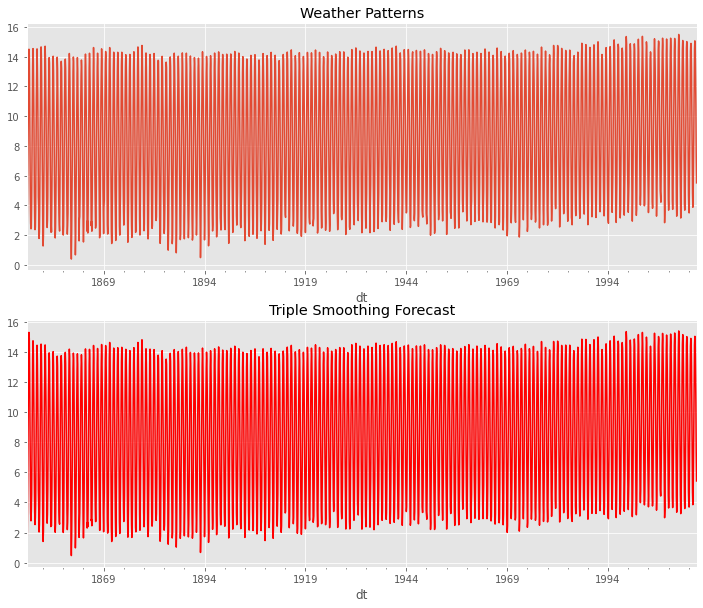

In [40]:


### Plot Single Exponential Smoothing forecasted value
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(2,1,1)
df['LandAverageTemperature'].plot(ax=ax)
ax.set_title('Weather Patterns')
ax = fig.add_subplot(2,1,2)
df['TES'].plot(ax=ax, color='r')
ax.set_title('Triple Smoothing Forecast')

# Predicting the weather with a SARIMA model

In [41]:
ts = df[['LandAverageTemperature']]

In [42]:
ts

,LandAverageTemperature
dt,
1850-01-01,0.749
1850-02-01,3.071
1850-03-01,4.954
1850-04-01,7.217
1850-05-01,10.004
...,...
2015-08-01,14.755
2015-09-01,12.999
2015-10-01,10.801


In [43]:
len(ts)

1992

In [44]:
#X = ts.loc[:'2012-01-01'].values
#y = ts.loc['2012-01-02':].values

In [45]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( ts, ts, test_size=0.10, random_state=42)

In [46]:
print(X.shape)
print(y.shape)

(1992, 1)
(1992,)


In [47]:
#Scaling data to improve computing time
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True)
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [48]:
#1 autoregressive term, 1 differencing term, 1 moving average term
#The 12 at the end os seasonal_order is to use monthly data for predictions
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,12), enforce_invertibility=True)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:             LandAverageTemperature   No. Observations:                 1992
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -646.143
Date:                            Tue, 25 Aug 2020   AIC                           1302.287
Time:                                    13:10:45   BIC                           1330.239
Sample:                                01-01-1850   HQIC                          1312.556
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3231      0.020     16.343      0.000       0.284       0.362
ma.L1         -0.9533      0.008   -116.496      0.000      -0.969      -0.937
ar.S.L12       0.0023      0.019      0.117      0.907      -0.036       0.040
ma.S.L12      -0.9568      0.008   -118.061      0.000      -0.973      -0.941
sigma2         0.1106      0.003     42.928      0.000       0.106       0.116
===================================================================================
Ljung-Box (Q):                       73.26   Jarque-Bera (JB):               278.96
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
start = len(y_train)
end = len(y_train) + len(y_test) - 1
preds = results.predict(start=start, end=end, typ='levels')

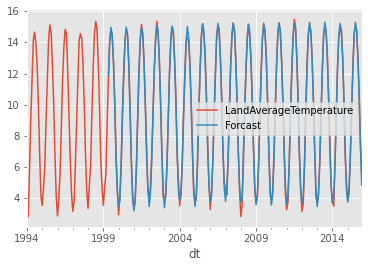

In [50]:
ax = ts['1994-01-01':].plot(label='Actual')
preds.plot(label='Forcast')
plt.legend()

In [51]:
from sklearn.metrics import mean_absolute_error

In [52]:
mean_absolute_error(y_test, preds)

4.926491848594305

# Kmeans clustering

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1992 entries, 1850-01-01 to 2015-12-01
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         1992 non-null   object 
 1   LandAverageTemperature                     1992 non-null   float64
 2   LandAverageTemperatureUncertainty          1992 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
 9   land_ocean_monthly_average                 1963 non-null   float64
 10  land_m

In [54]:
df.dropna(inplace=True)

In [55]:
df.isnull().sum()

dt                                           0
LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
land_ocean_monthly_average                   0
land_monthly_average                         0
differenced_temp                             0
differenced_temp_monthly_average             0
TES                                          0
dtype: int64

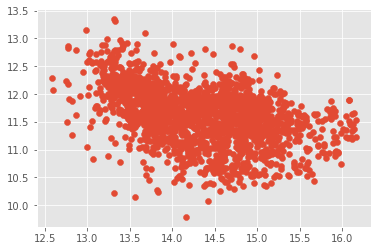

In [56]:
plt.scatter(df['land_monthly_average'], df['differenced_temp'])

In [57]:
from sklearn.cluster import KMeans

In [58]:
cluster1 = df[['land_monthly_average', 'differenced_temp']]

In [59]:
cluster2 = df[['LandMaxTemperature', 'differenced_temp']]

In [60]:
km2 = KMeans(n_clusters=5)

In [61]:
km = KMeans(n_clusters=5)

In [62]:
preds = km.fit_predict(cluster1)

In [63]:
preds2 = km2.fit_predict(cluster2)

In [64]:
cluster2['preds2'] =preds2

In [65]:
cluster1['preds'] = preds

# It looks like when the difference in minimum amd maximum temperatures is the smallest thats when the maximum land temperature is the highest.  This is easier to see when I cluster LandMaxTemp with the differenced_temp not land_monthly_average with differenced_temp like shown below(I tried both). Cluster 3's differenced_mean is slightly higher than cluster 4.  But when looking at the numbers there is a different result.

<AxesSubplot:xlabel='LandMaxTemperature', ylabel='differenced_temp'>

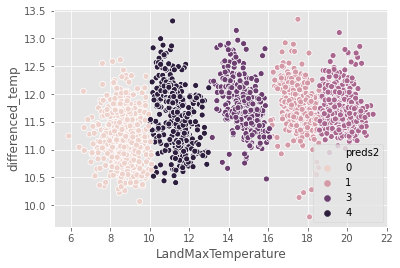

In [66]:
sns.scatterplot('LandMaxTemperature', 'differenced_temp', hue=cluster2['preds2'], data=cluster2)

<AxesSubplot:xlabel='land_monthly_average', ylabel='differenced_temp'>

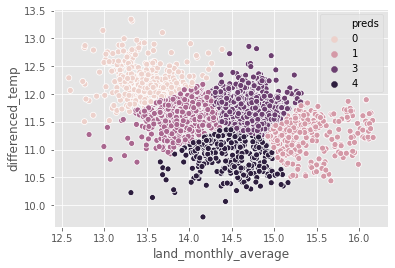

In [67]:
sns.scatterplot('land_monthly_average', 'differenced_temp', hue=cluster1['preds'], data=cluster1)

# These following numbers are for the clusters of differenced_temp and land_monthly_average since it's harder to visualize.

In [68]:
one = cluster1[cluster1['preds'] == 0]

In [69]:
two = cluster1[cluster1['preds'] == 1]

In [70]:
three = cluster1[cluster1['preds'] == 2]

In [71]:
four = cluster1[cluster1['preds'] == 3]

In [72]:
five = cluster1[cluster1['preds'] == 4]

In [73]:
print(one['differenced_temp'].std())
print(two['differenced_temp'].std())
print(three['differenced_temp'].std())
print(four['differenced_temp'].std())
print(five['differenced_temp'].std())

0.2944491441463824
0.3117183888006636
0.2500406282988219
0.26646786806714
0.2887573570753141


In [74]:
print(one['differenced_temp'].mean())
print(two['differenced_temp'].mean())
print(three['differenced_temp'].mean())
print(four['differenced_temp'].mean())
print(five['differenced_temp'].mean())

12.227744623655918
11.265782456140352
11.601209401709399
11.777656250000012
10.887578231292517


In [75]:
print(one['land_monthly_average'].std())
print(two['land_monthly_average'].std())
print(three['land_monthly_average'].std())
print(four['land_monthly_average'].std())
print(five['land_monthly_average'].std())

0.28372704892707906
0.33060852514923483
0.2519265562445743
0.23584746132149909
0.3145792367828685


In [76]:
print(one['land_monthly_average'].mean())
print(two['land_monthly_average'].mean())
print(three['land_monthly_average'].mean())
print(four['land_monthly_average'].mean())
print(five['land_monthly_average'].mean())

13.482500179211469
15.39741134502922
13.883141737891725
14.730567892156857
14.470475170068031


In [147]:
from arcgis.gis import *
gis = GIS()

In [148]:
Lebanon = gis.map('Lebanon')
Lebanon


MapView(layout=Layout(height='400px', width='100%'))

In [149]:
search_result = gis.content.search('title:"Multispectral Landsat"')
search_result

[<Item title:"Multispectral Landsat" type:Imagery Layer owner:esri>,
 <Item title:"San Mango sul Calore - Multispectral Landsat Infrared" type:Web Map owner:Flandi636>,
 <Item title:"Multispectral Landsat-AcquisitionDate (11/2/2019, 2:52 PM)" type:Imagery Layer owner:jcbertha>,
 <Item title:"Multispectral Landsat - PJS" type:Imagery Layer owner:Samuel_KCTCS>,
 <Item title:"Multispectral Landsat-AcqDate 8/6/1989, 8:00 PM - 7/23/2007, 8:00 PM)" type:Imagery Layer owner:jamosheim25>,
 <Item title:"Multispectral Landsat Map" type:Web Map owner:BBF001>,
 <Item title:"Multispectral Landsat-AcquisitionDate (4/21/2019, 1:01 PM)" type:Imagery Layer owner:Olya_1717>,
 <Item title:"multispectral landsat map" type:Web Map owner:Vrinda_Prakash_LearnArcGIS7>,
 <Item title:"Multispectral Landsat" type:Web Mapping Application owner:liziblue>,
 <Item title:"Multispectral Landsat - AcqDate 8-6-89" type:Imagery Layer owner:jamosheim25>]

In [150]:
search_results = search_result[0]
Lebanon.add_layer(search_results)

In [151]:
Lebanon.layers

[<ImageryLayer url:"https://landsat2.arcgis.com/arcgis/rest/services/Landsat/MS/ImageServer">]

In [153]:
search_result_layer = Lebanon.layers[0]

print(search_result_layer.url)
for field in search_result_layer.properties['fields']:
    print(field['name'] + '\t:' + field['type'])



https://landsat2.arcgis.com/arcgis/rest/services/Landsat/MS/ImageServer
OBJECTID	:esriFieldTypeOID
Name	:esriFieldTypeString
MinPS	:esriFieldTypeDouble
MaxPS	:esriFieldTypeDouble
LowPS	:esriFieldTypeDouble
HighPS	:esriFieldTypeDouble
Category	:esriFieldTypeInteger
GroupName	:esriFieldTypeString
ProductName	:esriFieldTypeString
CenterX	:esriFieldTypeDouble
CenterY	:esriFieldTypeDouble
Shape	:esriFieldTypeGeometry
WRS_Path	:esriFieldTypeInteger
WRS_Row	:esriFieldTypeInteger
Best	:esriFieldTypeInteger
AcquisitionDate	:esriFieldTypeDate
DateUpdated	:esriFieldTypeDate
SunAzimuth	:esriFieldTypeDouble
SunElevation	:esriFieldTypeDouble
CloudCover	:esriFieldTypeDouble
PR	:esriFieldTypeInteger
Latest	:esriFieldTypeInteger
DayOfYear	:esriFieldTypeInteger
Month	:esriFieldTypeSmallInteger
SensorName	:esriFieldTypeString
dataset_id	:esriFieldTypeString
LANDSAT_PRODUCT_ID	:esriFieldTypeString


In [154]:
Lebanon.add_layer(search_result_layer, {'renderer': 'ClassSizeRenderer', 'field_name': 'RANGE'})

In [155]:
Lebanon

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

# Changing weather patterns are going to have a dramatic impact on farming.  With increased ocean temperatures increases the rate of evaporation, storms are going to become less frequent but more severe creating more runoff which will lead to soil erosion.  This is only one example of how climate change will have a negative impact on the environment.